In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')

In [2]:
def join_labels(type_): 
    '''To add the NamesID on the data and the path in where the image is located'''
    my_type = pd.read_csv('{}_labels.csv'.format(str(type_)))
    my_class_list = pd.read_csv('class_list.txt', 
                                sep='\s+' , engine='python', header=None, names=['label','Names'])
    return  my_type.merge(my_class_list)

In [3]:
my_train = join_labels('train')
my_val = join_labels('val')

In [4]:
my_val

,img_name,label,Names
0,val_010323.jpg,247,eccles_cake
1,val_010350.jpg,247,eccles_cake
2,val_010389.jpg,247,eccles_cake
3,val_010404.jpg,247,eccles_cake
4,val_010471.jpg,247,eccles_cake
...,...,...,...
11989,val_006665.jpg,189,limpet_food
11990,val_007712.jpg,189,limpet_food
11991,val_008322.jpg,189,limpet_food
11992,val_008666.jpg,189,limpet_food


In [5]:
my_train

,img_name,label,Names
0,train_101733.jpg,211,dolmas
1,train_101734.jpg,211,dolmas
2,train_101735.jpg,211,dolmas
3,train_101736.jpg,211,dolmas
4,train_101737.jpg,211,dolmas
...,...,...,...
118470,train_101728.jpg,123,fried_rice
118471,train_101729.jpg,123,fried_rice
118472,train_101730.jpg,123,fried_rice
118473,train_101731.jpg,123,fried_rice


In [8]:
my_train.img_name[0]

'train_101733.jpg'

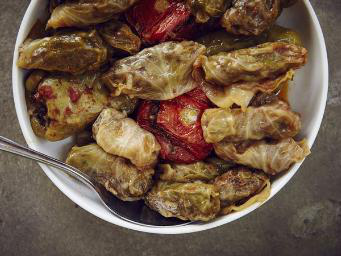

In [19]:
Image.open("/Users/dorothy/Documents/540project1/train_set/"+my_train.img_name[8])

In [20]:
os.getcwd()

'/Users/dorothy/Documents/540p2'

In [ ]:
for image in tqdm(os.listdir(train_set)): 
    path = os.path.join(train_set, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)

In [13]:
import torch
import torchvision
import torch.nn as nn

input_size = 128*128
num_classes = 251

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [14]:
print(model.weight.shape)
model.weight

torch.Size([251, 16384])


Parameter containing:
tensor([[ 4.9738e-03,  6.8642e-03, -3.5083e-03,  ...,  6.5321e-03,
          4.9901e-03, -1.9989e-04],
        [-7.6050e-03, -7.4906e-03, -4.6162e-03,  ...,  5.9082e-03,
          1.6026e-03, -5.3887e-03],
        [ 5.5739e-03, -5.0934e-05,  4.5675e-03,  ..., -1.7984e-03,
          3.9248e-03, -4.4252e-03],
        ...,
        [ 3.1382e-04, -2.4959e-03,  4.2554e-03,  ...,  1.8099e-03,
          5.5441e-03,  3.4639e-03],
        [ 3.7781e-03, -3.7390e-03,  2.6967e-03,  ...,  2.7502e-03,
          7.7070e-03, -5.6192e-03],
        [ 5.7670e-03, -1.1372e-03,  3.6528e-03,  ..., -7.4276e-03,
         -6.6815e-03,  9.3039e-04]], requires_grad=True)

In [18]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 16384)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [17]:
128*128


16384

In [10]:
os.chdir('/Users/dorothy/Documents/540p2')

In [11]:
import os
os.getcwd()

'/Users/dorothy/Documents/540p2'

In [12]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        
for Name in my_train.Names.unique():
    createFolder('./valclass/'+Name)

In [13]:
import shutil
import os

source = '/Users/dorothy/Documents/540p2/val_set/'
dest1 = '/Users/dorothy/Documents/540p2/valclass/'

all_images = os.listdir('val_set')
df = pd.DataFrame(my_val)

for index, row in df.iterrows():
    shutil.move(source+str(row['img_name']), dest1+str(row['Names']+'/'))
    print('Moved {} to {}'.format(str(row['img_name']), dest1+str(row['Names']+'/')))

Moved val_010323.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010350.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010389.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010404.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010471.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010552.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010561.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010589.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010611.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010720.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010759.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010763.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/
Moved val_010804.jpg to /Users/dorothy/Documents/540p2/valclass/eccles_cake/

Moved val_010419.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010521.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010568.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010587.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010715.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010716.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010737.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010768.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010792.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010833.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010960.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_010994.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/
Moved val_011046.jpg to /Users/dorothy/Documents/540p2/valclass/mostaccioli/

Moved val_010544.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010553.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010573.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010730.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010751.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010756.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010764.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010776.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010807.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010813.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010847.jpg to /Users/dorothy/Documents/540p2/valclass/chicken_cordon_bleu/
Moved val_010920.jpg to /Users/dorothy/Documents/540p2/valclass/c

Moved val_011452.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011459.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011461.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011519.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011526.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011559.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011585.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011593.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011618.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011642.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011680.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011760.jpg to /Users/dorothy/Documents/540p2/valclass/chiffon_cake/
Moved val_011769.jpg to /Users/dorothy/Documents/540p2/valclass/

Moved val_010557.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010564.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010569.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010591.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010610.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010680.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010793.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010799.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010818.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010828.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010845.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010846.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/
Moved val_010892.jpg to /Users/dorothy/Documents/540p2/valclass/profiterole/

Moved val_011117.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011126.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011156.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011219.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011258.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011292.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011299.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011425.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011484.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011591.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011595.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011645.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/
Moved val_011669.jpg to /Users/dorothy/Documents/540p2/valclass/shirred_egg/

Moved val_011381.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011429.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011446.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011448.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011471.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011504.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011607.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011666.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011697.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011742.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011852.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011866.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011869.jpg to /Users/dorothy/Documents/540p2/valclass/entrecote/
Moved val_011983.jpg to /

Moved val_009550.jpg to /Users/dorothy/Documents/540p2/valclass/welsh_rarebit/
Moved val_009708.jpg to /Users/dorothy/Documents/540p2/valclass/welsh_rarebit/
Moved val_009911.jpg to /Users/dorothy/Documents/540p2/valclass/welsh_rarebit/
Moved val_010052.jpg to /Users/dorothy/Documents/540p2/valclass/welsh_rarebit/
Moved val_010132.jpg to /Users/dorothy/Documents/540p2/valclass/welsh_rarebit/
Moved val_000005.jpg to /Users/dorothy/Documents/540p2/valclass/tetrazzini/
Moved val_000125.jpg to /Users/dorothy/Documents/540p2/valclass/tetrazzini/
Moved val_000524.jpg to /Users/dorothy/Documents/540p2/valclass/tetrazzini/
Moved val_000599.jpg to /Users/dorothy/Documents/540p2/valclass/tetrazzini/
Moved val_000616.jpg to /Users/dorothy/Documents/540p2/valclass/tetrazzini/
Moved val_000633.jpg to /Users/dorothy/Documents/540p2/valclass/tetrazzini/
Moved val_000761.jpg to /Users/dorothy/Documents/540p2/valclass/tetrazzini/
Moved val_000959.jpg to /Users/dorothy/Documents/540p2/valclass/tetrazzin

Moved val_001043.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_001072.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_001135.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_001686.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_001704.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_001980.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_002469.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_002871.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_003560.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_003601.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_004031.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_004092.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_004272.jpg to /Users/dorothy/Documents/540p2/valclass/farfalle/
Moved val_004459.jpg to /Users/dorothy

Moved val_002267.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_002578.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_002702.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_002761.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_003225.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_003352.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_003843.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_003900.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_004123.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_004480.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_004652.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Moved val_004779.jpg to /Users/dorothy/Documents/540p2/valclass/hot_and_sour_soup/
Move

Moved val_006331.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_006373.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_006908.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_006952.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_007047.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_007224.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_007261.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_007466.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_007599.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_007693.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_007752.jpg to /Users/dorothy/Documents/540p2/valclass/spaghetti_carbonara/
Moved val_007790.jpg to /Users/dorothy/Documents/540p2/valclass/s

Moved val_008234.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_008706.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_008707.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_008793.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_009100.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_009223.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_009299.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_009475.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_009826.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_009880.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_009963.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_010215.jpg to /Users/dorothy/Documents/540p2/valclass/sponge_cake/
Moved val_000035.jpg to /Users/dorothy/Documents/540p2/valclass/fish_and_chi

Moved val_005390.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_005459.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_006347.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_006523.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_006584.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_006585.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_006685.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_006872.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_006995.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_007265.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_007381.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_007404.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_007472.jpg to /Users/dorothy/Documents/540p2/valclass/tostada/
Moved val_007920.jpg to /Users/dorothy/Documents/54

Moved val_005767.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_005805.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_006338.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_006543.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_006677.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_006755.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_006838.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_007104.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_007208.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_007250.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_007733.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_007950.jpg to /Users/dorothy/Documents/540p2/valclass/tuna_tartare/
Moved val_008031.jpg to /Users/dorothy/Documents/540p2/valclass/

Moved val_002308.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_002377.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_002742.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_002762.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_003192.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_003278.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_003349.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_003415.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_003432.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_003751.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_003882.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_004013.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_004239.jpg to /Users/dorothy/Documents/540p2/valclass/fondue/
Moved val_004379.jpg to /Users/dorothy/Documents/540p2/valclass/

Moved val_007772.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008134.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008292.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008347.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008454.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008588.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008698.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008705.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008757.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008773.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_008946.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_009350.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_009847.jpg to /Users/dorothy/Documents/540p2/valclass/beignet/
Moved val_010109.jpg to /Users/dorothy/Documents/54

Moved val_005708.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_005779.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_006076.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_006399.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_006974.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_007917.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_008885.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_008941.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_008942.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_009120.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_009427.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_010146.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_010173.jpg to /Users/dorothy/Documents/540p2/valclass/vermicelli/
Moved val_00

Moved val_004479.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_004555.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_004862.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005198.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005220.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005345.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005391.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005533.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005594.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005720.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005774.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005782.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_005818.jpg to /Users/dorothy/Documents/540p2/valclass/fruitcake/
Moved val_006128.jpg to /

Moved val_009397.jpg to /Users/dorothy/Documents/540p2/valclass/terrine/
Moved val_009501.jpg to /Users/dorothy/Documents/540p2/valclass/terrine/
Moved val_010181.jpg to /Users/dorothy/Documents/540p2/valclass/terrine/
Moved val_000114.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_000269.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_000317.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_000390.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_000445.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_000470.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_000889.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_001251.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_001557.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_001578.jpg to /Users/dorothy/Documents/540p2/valclass/compote/
Moved val_001652.jpg to /Users/dorothy/Documents/54

Moved val_000159.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_000178.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_000539.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_000809.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_000834.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_000902.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_001271.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_001426.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_001741.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_002165.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_002313.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_002392.jpg to /Users/dorothy/Documents/540p2/valclass/grilled_salmon/
Moved val_002795.jpg to /Users/dorothy/D

Moved val_009537.jpg to /Users/dorothy/Documents/540p2/valclass/caesar_salad/
Moved val_009560.jpg to /Users/dorothy/Documents/540p2/valclass/caesar_salad/
Moved val_010108.jpg to /Users/dorothy/Documents/540p2/valclass/caesar_salad/
Moved val_010284.jpg to /Users/dorothy/Documents/540p2/valclass/caesar_salad/
Moved val_000135.jpg to /Users/dorothy/Documents/540p2/valclass/spring_roll/
Moved val_000215.jpg to /Users/dorothy/Documents/540p2/valclass/spring_roll/
Moved val_000307.jpg to /Users/dorothy/Documents/540p2/valclass/spring_roll/
Moved val_000529.jpg to /Users/dorothy/Documents/540p2/valclass/spring_roll/
Moved val_000680.jpg to /Users/dorothy/Documents/540p2/valclass/spring_roll/
Moved val_000768.jpg to /Users/dorothy/Documents/540p2/valclass/spring_roll/
Moved val_000923.jpg to /Users/dorothy/Documents/540p2/valclass/spring_roll/
Moved val_001131.jpg to /Users/dorothy/Documents/540p2/valclass/spring_roll/
Moved val_001325.jpg to /Users/dorothy/Documents/540p2/valclass/spring_r

Moved val_002107.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_002320.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_002359.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_002606.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_002769.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_002859.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_004412.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_004519.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_004860.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_004942.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_005385.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_005763.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_005841.jpg to /Users/dorothy/Documents/540p2/valclass/waffle/
Moved val_005915.jpg to /Users/dorothy/Documents/540p2/valclass/

Moved val_006446.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_006483.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_006842.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_006893.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_007451.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_007531.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_007739.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_007824.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_007969.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_008004.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_008021.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_008209.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_008393.jpg to /Users/dorothy/Documents/540p2/valclass/gnocchi/
Moved val_008401.jpg to /Users/dorothy/Documents/54

Moved val_003129.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_003707.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_003747.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_003964.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_003968.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_004307.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_004329.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_005146.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_005296.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_005496.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_005742.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_005859.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_006333.jpg to /Users/dorothy/Documents/540p2/valclass/guacamole/
Moved val_006460.jpg to /

Moved val_002989.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_003358.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_003454.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_004172.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_004228.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_004693.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_004740.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_004841.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_005236.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_005490.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_005515.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_005866.jpg to /Users/dorothy/Documents/540p2/valclass/pepper_steak/
Moved val_006079.jpg to /Users/dorothy/Documents/540p2/valclass/

Moved val_001103.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_001293.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_001294.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_001385.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002114.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002213.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002416.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002695.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002719.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002760.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002792.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002799.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002913.jpg to /Users/dorothy/Documents/540p2/valclass/tiramisu/
Moved val_002917.jpg to /Users/dorothy

Moved val_003595.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_003808.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_004323.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_004682.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_004847.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_004908.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_005004.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_005077.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_005400.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_005413.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_006242.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_006339.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_006516.jpg to /Users/dorothy/Documents/540p2/valclass/chop_suey/
Moved val_006535.jpg to /

Moved val_009991.jpg to /Users/dorothy/Documents/540p2/valclass/edamame/
Moved val_000283.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_000373.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_000497.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_000541.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_000553.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_000618.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_000714.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_000892.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_001527.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_001563.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_001904.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_001948.jpg to /Users/dorothy/Documents/540p2/valclass/pound_cake/
Moved val_00214

Moved val_008714.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_008766.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_008834.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_008855.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_009009.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_009170.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_009195.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_009440.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_009533.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_009617.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_009942.jpg to /Users/dorothy/Documents/540p2/valclass/moussaka/
Moved val_000305.jpg to /Users/dorothy/Documents/540p2/valclass/penne/
Moved val_000340.jpg to /Users/dorothy/Documents/540p2/valclass/penne/
Moved val_000409.jpg to /Users/dorothy/Docum

Moved val_002714.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_002766.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_002803.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_003217.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_003494.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_003754.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_003972.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_003994.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_004175.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_004227.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_004789.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_004914.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_004928.jpg to /Users/dorothy/Documents/540p2/valclass/baklava/
Moved val_005047.jpg to /Users/dorothy/Documents/54

Moved val_002665.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_002872.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_003006.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_003566.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_003580.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_003613.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_003912.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_003962.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_003969.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_003979.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_004177.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_004532.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/
Moved val_004854.jpg to /Users/dorothy/Documents/540p2/valclass/deviled_egg/

Moved val_005997.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_006265.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_006310.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_007001.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_007094.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_007132.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_007160.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_007205.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_007660.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_007669.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_007999.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_008082.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_008255.jpg to /Users/dorothy/Documents/540p2/valclass/porridge/
Moved val_008297.jpg to /Users/dorothy

Moved val_008673.jpg to /Users/dorothy/Documents/540p2/valclass/beef_wellington/
Moved val_009004.jpg to /Users/dorothy/Documents/540p2/valclass/beef_wellington/
Moved val_009260.jpg to /Users/dorothy/Documents/540p2/valclass/beef_wellington/
Moved val_009362.jpg to /Users/dorothy/Documents/540p2/valclass/beef_wellington/
Moved val_009730.jpg to /Users/dorothy/Documents/540p2/valclass/beef_wellington/
Moved val_009793.jpg to /Users/dorothy/Documents/540p2/valclass/beef_wellington/
Moved val_009988.jpg to /Users/dorothy/Documents/540p2/valclass/beef_wellington/
Moved val_010128.jpg to /Users/dorothy/Documents/540p2/valclass/beef_wellington/
Moved val_000534.jpg to /Users/dorothy/Documents/540p2/valclass/osso_buco/
Moved val_000773.jpg to /Users/dorothy/Documents/540p2/valclass/osso_buco/
Moved val_001151.jpg to /Users/dorothy/Documents/540p2/valclass/osso_buco/
Moved val_001216.jpg to /Users/dorothy/Documents/540p2/valclass/osso_buco/
Moved val_001625.jpg to /Users/dorothy/Documents/540

Moved val_007274.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_007288.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_007353.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_007366.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_007405.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_007409.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_007419.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_007615.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_008102.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_008171.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_008560.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_008800.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_008846.jpg to /Users/dorothy/Documents/540p2/valclass/crumpet/
Moved val_008916.jpg to /Users/dorothy/Documents/54

Moved val_003382.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_003429.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_003871.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_003992.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_004334.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_004566.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_004732.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_004800.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_005228.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_005295.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_005888.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_006206.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_006274.jpg to /Users/dorothy/Documents/540p2/valclass/applesauce/
Moved val_00

In [5]:
import pandas as pd

a = ['test_000000.jpg','test_000001.jpg','test_000002.jpg','test_000003.jpg','test_000004.jpg','test_000005.jpg','test_000006.jpg',
    'test_000007.jpg','test_000008.jpg','test_000009.jpg','test_000010.jpg']
b = [43,4,6,104,26,21,23,212,32,9,104]


#字典中的key值即为csv中列名
dataframe = pd.DataFrame({'img_name':a,'label':b})

#将DataFrame存储为csv,index表示是否显示行名，default=True
dataframe.to_csv("test.csv",index=False,sep=',')
